In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# --- Load the Data ---

In [2]:
df = pd.read_csv("./Data/cleanedChurn.csv")
df

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,PaperlessBilling,MonthlyCharges,TotalCharges,Churn,...,TechSupport_Yes,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,0,1,0,1,0,1,29.85,29.85,0,...,0,0,0,0,0,0,0,0,1,0
1,1,0,0,0,34,1,0,56.95,1889.50,0,...,0,0,0,0,0,1,0,0,0,1
2,1,0,0,0,2,1,1,53.85,108.15,1,...,0,0,0,0,0,0,0,0,0,1
3,1,0,0,0,45,0,0,42.30,1840.75,0,...,1,0,0,0,0,1,0,0,0,0
4,0,0,0,0,2,1,1,70.70,151.65,1,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7027,1,0,1,1,24,1,1,84.80,1990.50,0,...,1,0,1,0,1,1,0,0,0,1
7028,0,0,1,1,72,1,1,103.20,7362.90,0,...,0,0,1,0,1,1,0,1,0,0
7029,0,0,1,1,11,0,1,29.60,346.45,0,...,0,0,0,0,0,0,0,0,1,0
7030,1,1,1,0,4,1,1,74.40,306.60,1,...,0,0,0,0,0,0,0,0,0,1


# --- Initial Data Inspection ---

In [3]:
print("\n--- First 5 rows of the dataset ---")
print(df.head())
print("\n" + "="*50 + "\n")

print("--- Dataset Information (Data Types and Missing Values) ---")
df.info()
print("\n" + "="*50 + "\n")

print("--- Descriptive Statistics for Numerical Columns ---")
print(df.describe())
print("\n" + "="*50 + "\n")


--- First 5 rows of the dataset ---
   gender  SeniorCitizen  Partner  Dependents  tenure  PhoneService  \
0       0              0        1           0       1             0   
1       1              0        0           0      34             1   
2       1              0        0           0       2             1   
3       1              0        0           0      45             0   
4       0              0        0           0       2             1   

   PaperlessBilling  MonthlyCharges  TotalCharges  Churn  ...  \
0                 1           29.85         29.85      0  ...   
1                 0           56.95       1889.50      0  ...   
2                 1           53.85        108.15      1  ...   
3                 0           42.30       1840.75      0  ...   
4                 1           70.70        151.65      1  ...   

   TechSupport_Yes  StreamingTV_No internet service  StreamingTV_Yes  \
0                0                                0                0   
1

# --- Churn Rate Calculation ---

In [4]:
print("--- Overall Churn Rate ---")
churn_rate = df['Churn'].mean() * 100
print(f"Overall Churn Rate: {churn_rate:.2f}%\n")

--- Overall Churn Rate ---
Overall Churn Rate: 26.58%



# --- Visualizations ---

In [5]:
sns.set_style("whitegrid")

# Churn distribution by key categorical features

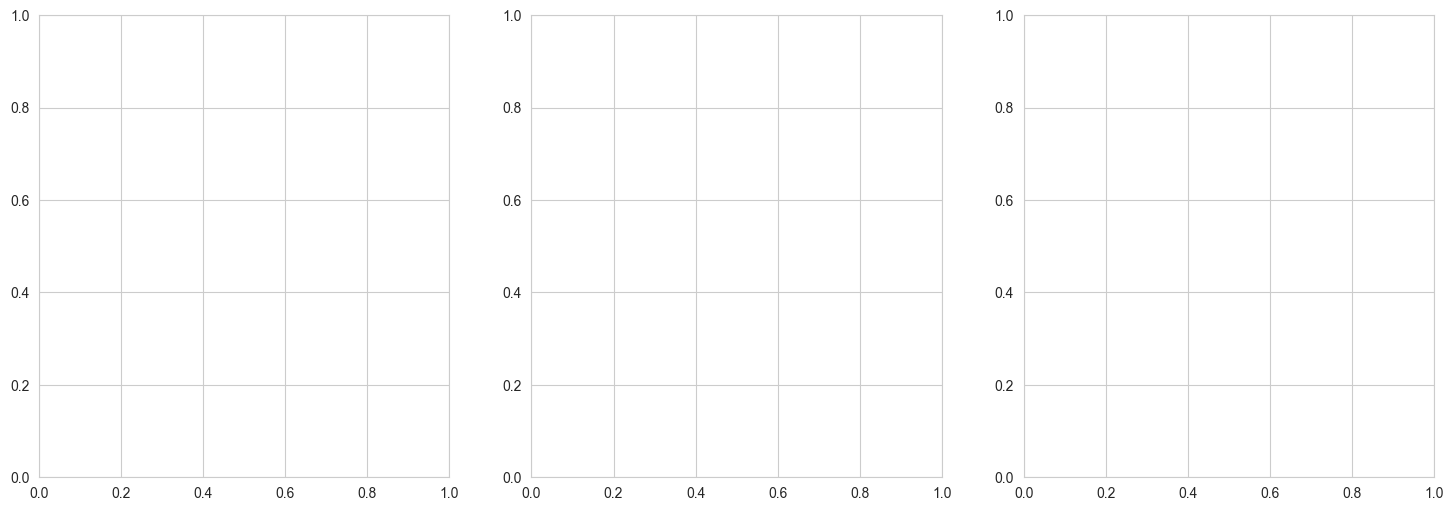

In [6]:
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

# Churn by Contract Type

In [7]:
sns.countplot(x='Contract_One year', hue='Churn', data=df, ax=axes[0])
axes[0].set_title('Churn by Contract Type (One Year)')

Text(0.5, 1.0, 'Churn by Contract Type (One Year)')

# Churn by Payment Method

In [8]:
sns.countplot(x='PaymentMethod_Electronic check', hue='Churn', data=df, ax=axes[1])
axes[1].set_title('Churn by Electronic Check Payment Method')

Text(0.5, 1.0, 'Churn by Electronic Check Payment Method')

# Churn by Fiber Optic Service

In [9]:
sns.countplot(x='InternetService_Fiber optic', hue='Churn', data=df, ax=axes[2])
axes[2].set_title('Churn by Fiber Optic Service')
    
plt.tight_layout()
plt.show()

<Figure size 640x480 with 0 Axes>

# Distribution of MonthlyCharges and Tenure by Churn

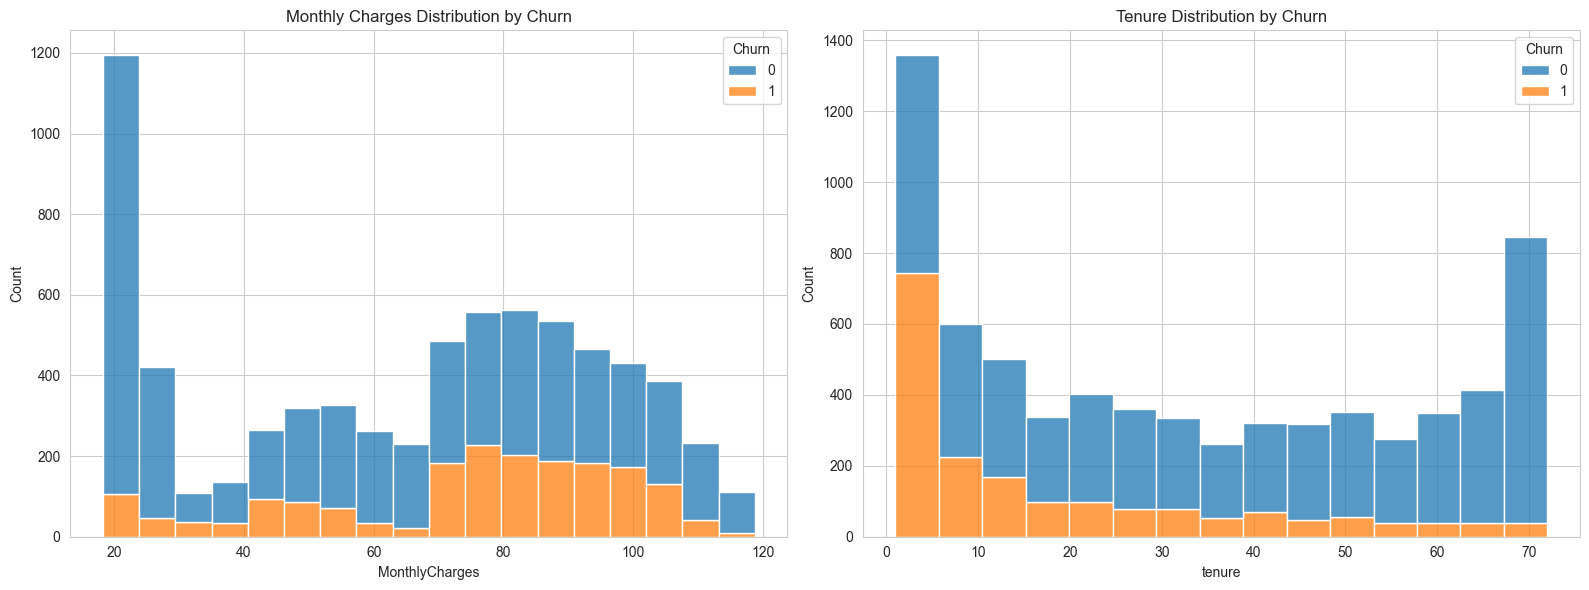

In [10]:
fig, axes = plt.subplots(1, 2, figsize=(16, 6))
sns.histplot(data=df, x='MonthlyCharges', hue='Churn', multiple='stack', ax=axes[0])
axes[0].set_title('Monthly Charges Distribution by Churn')
sns.histplot(data=df, x='tenure', hue='Churn', multiple='stack', ax=axes[1])
axes[1].set_title('Tenure Distribution by Churn')
plt.tight_layout()
plt.show()

# Correlation Heatmap

In [11]:
# plt.figure(figsize=(12, 10))
# numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns
# correlation_matrix = df[numerical_cols].corr()
# sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
# plt.title('Correlation Matrix of Numerical Features')
# plt.show()